# Assignment 5 - COMP 6934
### Name: Ganeshkirubashankar Pavadaisamy
### Student ID: 202192154
### Date: 15 Mar 2023

### Importing Necessary Libararies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display, HTML
from ipywidgets import ToggleButtons
from ipywidgets import ToggleButtons, Layout
from ipywidgets import Dropdown
import warnings
from ipywidgets import Text
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Question 1: (25 pts) The following heatmap shows the average carat weight of diamonds relative to their clarity and colour. An interactive dropdown menu allows for the data to be filtered around the origin of the diamonds. The “Natural” option filters to only naturally occurring diamonds, “Lab” filters to manufactured diamonds, and “All’ applies no filtering. In the example below, we can see that the heaviest diamonds are those with the poorest quality. Re-create the above heatmap and interactive feature. The heatmap should update based upon the item selected in the dropdown menu. The colour map is “mako”. The ordering of the colour and clarity should be in ascending order, such that colourless, internally flawless diamonds are in the top right.

### Importing Df

In [2]:
df = pd.read_csv('diamonds.csv')
df

,id,url,shape,price,carat,cut,colour,clarity,report,type,date_fetched
0,10086429,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,10016334,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,9947216,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,10083437,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,9946136,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
...,...,...,...,...,...,...,...,...,...,...,...
119100,10081678,https://www.brilliantearth.com//lab-diamonds-s...,Round,99040,5.71,Super Ideal,D,VVS2,GCAL,lab,2020-11-29 12-26 PM
119101,9521564,https://www.brilliantearth.com//lab-diamonds-s...,Cushion,107330,15.32,Very Good,G,SI2,IGI,lab,2020-11-29 12-26 PM
119102,9896730,https://www.brilliantearth.com//lab-diamonds-s...,Cushion,110110,10.05,Ideal,D,SI2,IGI,lab,2020-11-29 12-26 PM
119103,9756570,https://www.brilliantearth.com//lab-diamonds-s...,Oval,126030,10.33,Fair,D,VS2,IGI,lab,2020-11-29 12-26 PM


In [3]:
#Function to plot heatmap
def displayHeatMap (data):
    # Selecting df according to the order given in the question
    data = data.pivot(index='colour', columns='clarity', values='carat')[['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1]);
    # plotting the Heatmap
    sns.heatmap(data, ax=ax, cmap='mako');
    plt.show()

#Defining  df for the the selection of Dropdown
def f(Origin):
    if (Origin == 1):
        displayHeatMap(df.groupby(['colour', 'clarity'])['carat' ].mean().reset_index());
    elif (Origin == 2):
        displayHeatMap(df[df['type'] == 'natural'].groupby(['colour', 'clarity'])['carat'].mean().reset_index());
    elif (Origin == 3):
        displayHeatMap(df[df['type'] == 'lab'].groupby(['colour', 'clarity'])['carat'].mean().reset_index());
widgets.interact(f, Origin= [('All', 1), ('Natural', 2), ('Lab', 3)]);

interactive(children=(Dropdown(description='Origin', options=(('All', 1), ('Natural', 2), ('Lab', 3)), value=1…

### Question 2: (75 pts) Re-create the interactive experience in the “Top baby names” visualization published by the UK Office for National Statistics, which can be found here: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/bulletins/ babynamesenglandandwales/2020
### This visualization shows the popularity rank of baby boy and girl names over the period from 1996 to 2020. Only the top 100 baby names in 2020 are included. The rank of each of the 100 names is represented with a faded grey line. There is a toggle selection to switch between baby boy names and baby girl names. Names that are specified in the text box will be highlighted. The interactive features of your visualization should function in the same way as the original visualization. Specifically, they key features that must be included are: 
• Toggle buttons that change the represented data between baby boy names and baby girl names.
• A text box where names can be entered. If the name is present, then it will colour that line
and add points along the line at each year.
• Multiple names can be entered, separated by a space. Each name should be highlighted.
COMP 4304 / 6934 – Assignment 5 3 / 5
• Names should be case insensitive.
• A maximum of 6 names can be highlighted.
### You do not need to match the exact visual look of the interactive elements in the original visualization(which would be hard with ipywidgets). They just need to be present and to function correctly. Your visualization should generate no warnings or errors. ll 100 top baby names for 2020 should be drawn with a faded grey line. The 6 colours used for highlighting specific names are #206095, #004662, #A8BD3A, #27A0CC, #118C7B, and #F66068. Other stylistic components should match the original visualization. Each data point should be drawn along highlighted lines. The y-axis should be inverted (hint: ax.invert_yaxis()). The plot title should be present. There should be no labels on the x or y axes. The tick marks on the x-axis should be every 2 years. The tick marks on the y-axis should range from 1 to 1000, spaced on multiples of 100. There should be horizontal grid lines aligned with the y-axis tick marks (hint: ax.grid()). The left, right and top borders should be removed (hit: sns.despine()).

### Importing Df

In [4]:
names_df = pd.read_csv('names.csv')
names_df

,rank,name,count,year,sex
0,1,OLIVIA,3640,2020,girl
1,2,AMELIA,3319,2020,girl
2,3,ISLA,2749,2020,girl
3,4,AVA,2679,2020,girl
4,5,MIA,2303,2020,girl
...,...,...,...,...,...
50791,976,TOMMY-LEE,14,1996,boy
50792,976,TYLA,14,1996,boy
50793,976,WILFRED,14,1996,boy
50794,976,YOUSUF,14,1996,boy


In [5]:
# Seperating Boys df
boy_names_df = names_df[names_df['sex'] == "boy"]
boy_names_df

,rank,name,count,year,sex
25370,1,OLIVER,4225,2020,boy
25371,2,GEORGE,4100,2020,boy
25372,3,ARTHUR,4052,2020,boy
25373,4,NOAH,4042,2020,boy
25374,5,MUHAMMAD,3710,2020,boy
...,...,...,...,...,...
50791,976,TOMMY-LEE,14,1996,boy
50792,976,TYLA,14,1996,boy
50793,976,WILFRED,14,1996,boy
50794,976,YOUSUF,14,1996,boy


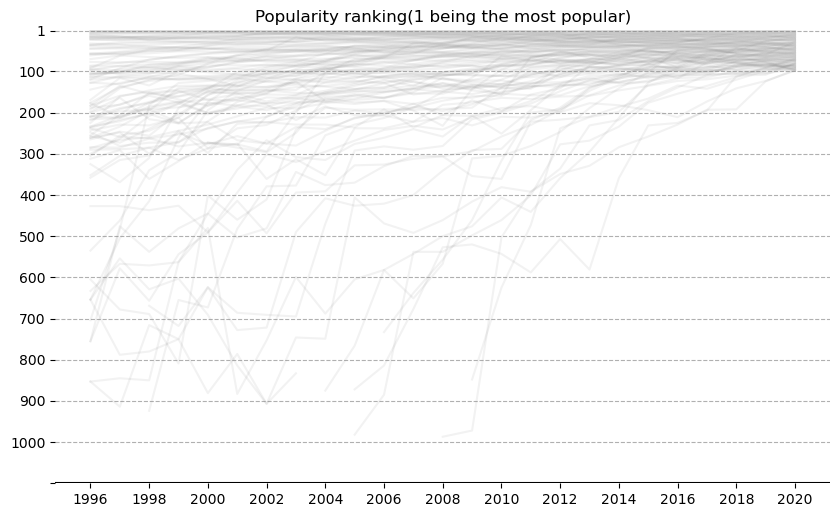

In [6]:
# Function to plot the Top 100 Popular boys names over the years
def boy_names():
    fig, ax = plt.subplots(figsize=(10,6), dpi=100)
    # Select the DataFrame to only the rows from 2020 and sort by count
    boy_df_2020 = boy_names_df[boy_names_df["year"] == 2020].sort_values(by="count", ascending=False)

    # Select the top 100 names and their  rankings between 1996 and 2022
    top_100_boy_names = boy_df_2020["name"].head(100)
    top_100_boy_rankings = {}
    for name in top_100_boy_names:
        boy_name_data = boy_names_df[boy_names_df["name"] == name]
        boy_rankings = boy_name_data[["year", "rank"]]
        boy_rankings = boy_rankings.set_index("year")
        boy_rankings_dict = boy_rankings.to_dict()["rank"]
        top_100_boy_rankings[name] = boy_rankings_dict

    # faded grey lines and their corresponding names
    faded_grey_lines = []
    faded_grey_line_names = []
    for name, boy_rankings_dict in top_100_boy_rankings.items():
            # Creating a list of the ranks for each year between 1996 and 2022
        ranks = [boy_rankings_dict.get(year, None) for year in range(1996, 2021)]
            # Plotting the ranks as a faded grey line
        line, = ax.plot(range(1996, 2021), ranks, color="grey", alpha=0.1)
        faded_grey_lines.append(line)
        faded_grey_line_names.append(name)

    ax.set_title("Popularity ranking(1 being the most popular)")
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_ylim(1000, 0)
    ax.set_yticks(range(1, 1001, 100))
    ax.set_yticks([1,100,200,300,400,500,600,700,800,900,1000,1100])
    ax.set_yticklabels(['1', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000',''])

    ax.set_xticks(range(1996, 2021, 2))

        # Show horizontal grid lines
    ax.grid(True, axis='y', linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axhline(y=1100, color='black')

boy_names()

In [7]:
#Selecting only Girl names in df
girl_names_df = names_df[names_df['sex'] == "girl"]
girl_names_df

,rank,name,count,year,sex
0,1,OLIVIA,3640,2020,girl
1,2,AMELIA,3319,2020,girl
2,3,ISLA,2749,2020,girl
3,4,AVA,2679,2020,girl
4,5,MIA,2303,2020,girl
...,...,...,...,...,...
25365,974,SAMMY-JO,21,1996,girl
25366,974,SHELBIE,21,1996,girl
25367,974,SIENNA,21,1996,girl
25368,974,TALITHA,21,1996,girl


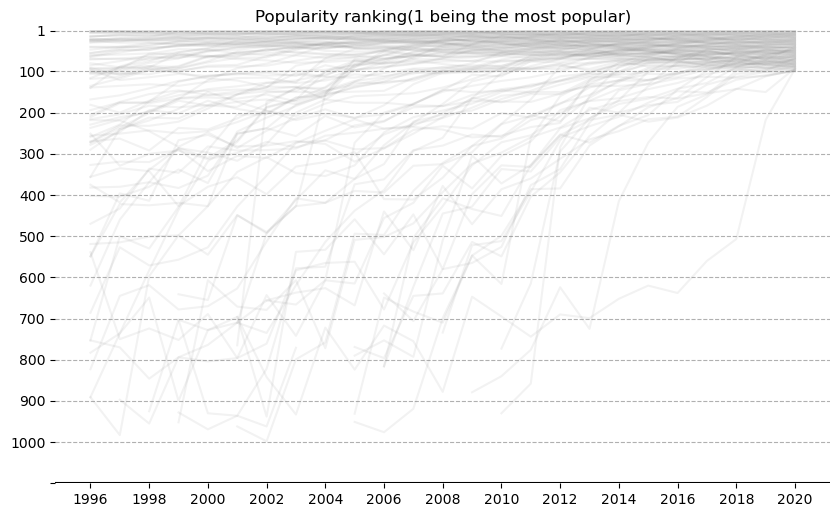

In [8]:
def girl_names():
    fig, ax = plt.subplots(figsize=(10,6), dpi=100)
    # Filter the DataFrame to only include rows from 2020 and sort by count
    girl_df_2020 = girl_names_df[girl_names_df["year"] == 2020].sort_values(by="count", ascending=False)

    # Get the top 100 names and their corresponding rankings between 1996 and 2022
    top_100_girl_names = girl_df_2020["name"].head(100)
    top_100_girl_rankings = {}
    for name in top_100_girl_names:
        girl_name_data = girl_names_df[girl_names_df["name"] == name]
        girl_rankings = girl_name_data[["year", "rank"]]
        girl_rankings = girl_rankings.set_index("year")
        girl_rankings_dict = girl_rankings.to_dict()["rank"]
        top_100_girl_rankings[name] = girl_rankings_dict

    # Create a list of the faded grey lines and their corresponding names
    faded_grey_lines = []
    faded_grey_line_names = []
    for name, girl_rankings_dict in top_100_girl_rankings.items():
            # Create a list of the ranks for each year between 1996 and 2022
        ranks = [girl_rankings_dict.get(year, None) for year in range(1996, 2021)]
            # Plot the ranks as a faded grey line
        line, = ax.plot(range(1996, 2021), ranks, color="grey", alpha=0.1)
        faded_grey_lines.append(line)
        faded_grey_line_names.append(name)

    ax.set_title("Popularity ranking(1 being the most popular)")
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_ylim(1000, 0)
    ax.set_yticks(range(1, 1001, 100))
    ax.set_yticks([1,100,200,300,400,500,600,700,800,900,1000,1100])
    ax.set_yticklabels(['1', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000',''])

    ax.set_xticks(range(1996, 2021, 2))

        # Show horizontal grid lines
    ax.grid(True, axis='y', linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axhline(y=1100, color='black')

girl_names()

In [9]:
# Define the toggle button widget
df_toggle = widgets.ToggleButtons(
    options=['Baby boy names', 'Baby girl names'],
    description='',
    value='Baby boy names',
    button_style=''
)
# Define a function to update the displayed DataFrame based on the toggle button value
def update_df(df):
    if df == 'Baby boy names':
        boy_names()
    elif df == 'Baby girl names':
        girl_names()

# Display the toggle button widget and call the update function on change
display(df_toggle)
df_toggle.observe(lambda change: update_df(change.new), names='value')

ToggleButtons(options=('Baby boy names', 'Baby girl names'), value='Baby boy names')